# Portfolio Optimization: Theory and practical Pitfalls



Key Learnings:

1. -> No Diversification Effect only if assets are __prefectly correlated__. If not, Portfolio Risk is __below weighted average Risk__!


If __all risky assets__ (that exist) are included:
- __Capital Market Line (CML)__ is the new __Efficient Frontier__ with all efficient Portfolios. 
- -> The __MSRP__ is the only __efficient risky Portfolio__. 
- -> __CML__ can be interpreted as set of __Portfolios consisting of Rf and MSRP__
- -> Every Investor should hold a __combination of Rf and MSRP__ (Two-Fund-Theorem).
- -> MSRP also called __Market Portfolio__ (MP). 

## Getting Started

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ['AAPL', 'BA', 'DIS', 'GE', 'JPM', 'MSFT', 'TSLA', 'WMT']
df = yf.download(symbol, start, end ).Close
df

[*********************100%%**********************]  8 of 8 completed


Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,53.54,358.78,138.83,44.66,115.40,137.52,15.45,38.78
2019-09-10,54.17,369.49,135.79,45.55,116.87,136.08,15.70,38.68
2019-09-11,55.90,382.94,136.19,46.65,117.19,136.12,16.47,38.67
2019-09-12,55.77,375.63,137.50,46.15,117.91,137.52,16.39,38.97
2019-09-13,54.69,379.76,138.02,46.55,120.23,137.32,16.35,39.14
...,...,...,...,...,...,...,...,...
2024-08-30,229.00,173.74,90.38,174.62,224.80,417.14,214.11,77.23
2024-09-03,222.77,161.02,89.13,164.21,220.30,409.44,210.60,77.17
2024-09-04,220.85,163.22,89.25,166.36,219.33,408.90,219.41,77.24


In [51]:
returns = df.pct_change()
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00


In [53]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [55]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
Ticker,,
AAPL,0.32,0.33
BA,0.51,-0.15
DIS,0.34,-0.09
GE,0.40,0.29
JPM,0.32,0.13
MSFT,0.30,0.24
TSLA,0.66,0.69
WMT,0.22,0.15


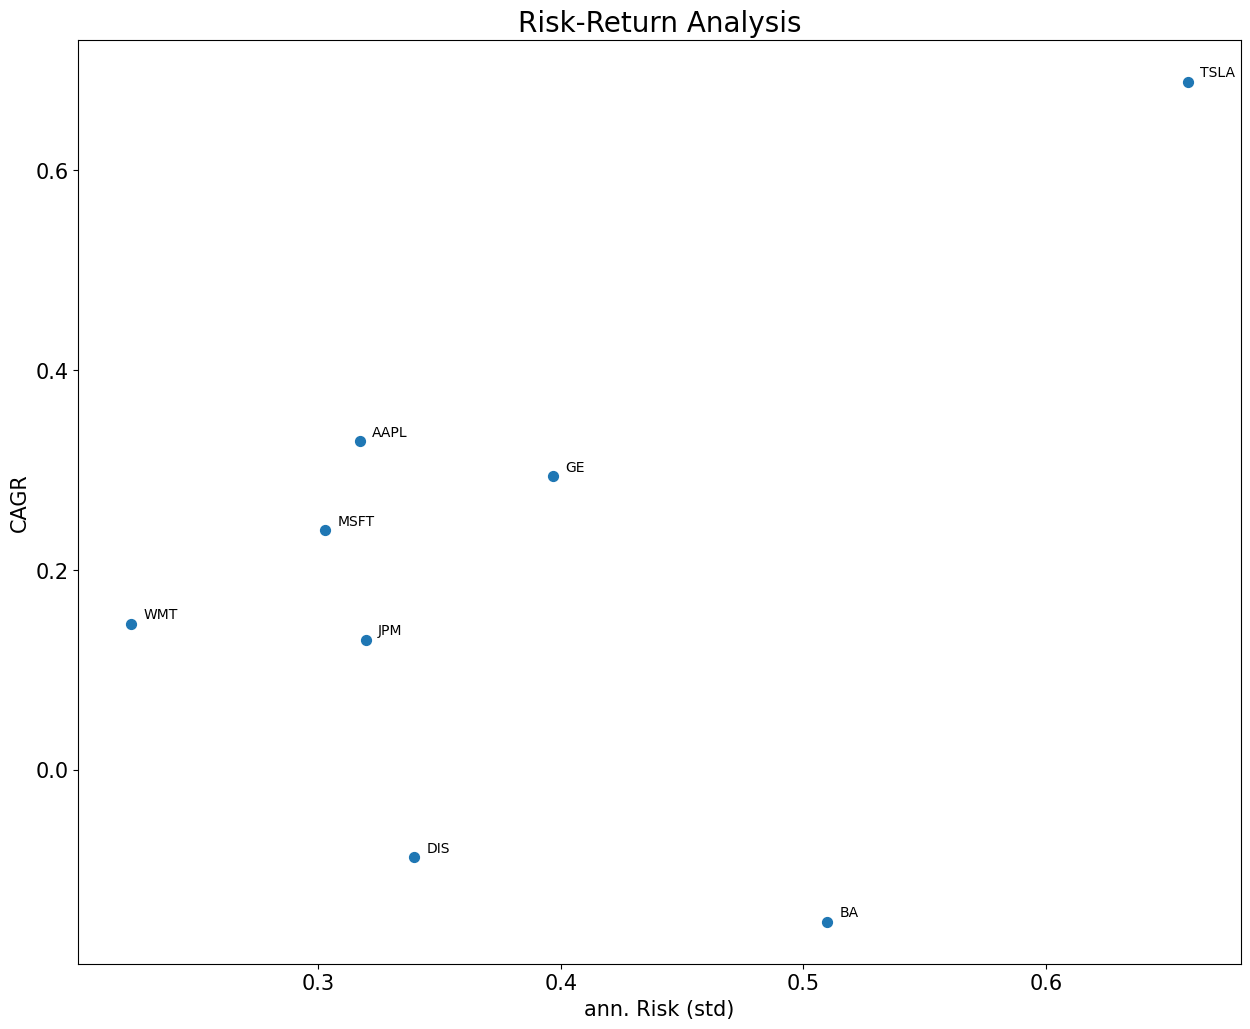

In [57]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()

## 2-Asset-Case (Intro)

In [59]:
summary

,ann. Risk,CAGR
Ticker,,
AAPL,0.32,0.33
BA,0.51,-0.15
DIS,0.34,-0.09
GE,0.40,0.29
JPM,0.32,0.13
MSFT,0.30,0.24
TSLA,0.66,0.69
WMT,0.22,0.15


In [61]:
assets = ["WMT", "AAPL"]

In [63]:
subset = summary.loc[assets]
subset

,ann. Risk,CAGR
Ticker,,
WMT,0.22,0.15
AAPL,0.32,0.33


In [65]:
subset.columns = ["Risk", "Return"]
subset

,Risk,Return
Ticker,,
WMT,0.22,0.15
AAPL,0.32,0.33


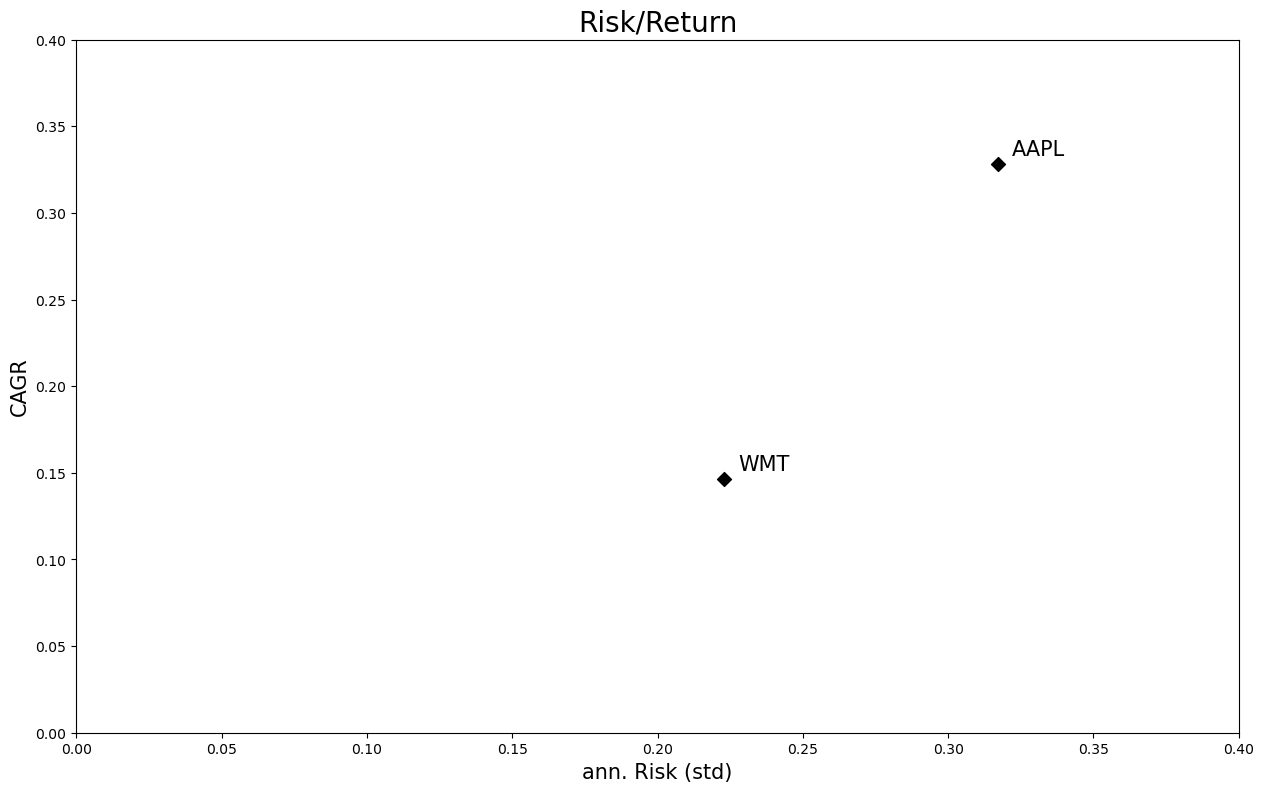

In [67]:
plt.figure(figsize = (15, 9))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 50, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.005, subset.loc[i, "Return"] + 0.005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Portfolio Return (2-Asset-Case)

In [71]:
nop = 100

In [73]:
w_A = np.linspace(0, 1, nop)
w_A

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [75]:
w_B = 1 - w_A
w_B

array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
       0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
       0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
       0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
       0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
       0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
       0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
       0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
       0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
       0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
       0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
       0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
       0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
       0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
       0.29292929, 0.28282828, 0.27272727, 0.26262626, 0.25252

In [77]:
weights = np.vstack((w_A, w_B)).T
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [79]:
w2 = weights[1]
w2

array([0.01010101, 0.98989899])

In [81]:
subset

,Risk,Return
Ticker,,
WMT,0.22,0.15
AAPL,0.32,0.33


In [114]:
# formula
r2 = w2[0] * subset.loc["WMT", "Return"] + w2[1] * subset.loc["AAPL", "Return"]
r2

0.32666047642163604

In [116]:
# vectorized
r2 = subset.Return.dot(w2)
r2

0.326660476421636

In [118]:
# vectorized for many portfolios
port_ret = subset.Return.dot(weights.T)
port_ret

array([0.32850035, 0.32666048, 0.3248206 , 0.32298072, 0.32114085,
       0.31930097, 0.3174611 , 0.31562122, 0.31378134, 0.31194147,
       0.31010159, 0.30826172, 0.30642184, 0.30458197, 0.30274209,
       0.30090221, 0.29906234, 0.29722246, 0.29538259, 0.29354271,
       0.29170283, 0.28986296, 0.28802308, 0.28618321, 0.28434333,
       0.28250345, 0.28066358, 0.2788237 , 0.27698383, 0.27514395,
       0.27330407, 0.2714642 , 0.26962432, 0.26778445, 0.26594457,
       0.26410469, 0.26226482, 0.26042494, 0.25858507, 0.25674519,
       0.25490531, 0.25306544, 0.25122556, 0.24938569, 0.24754581,
       0.24570594, 0.24386606, 0.24202618, 0.24018631, 0.23834643,
       0.23650656, 0.23466668, 0.2328268 , 0.23098693, 0.22914705,
       0.22730718, 0.2254673 , 0.22362742, 0.22178755, 0.21994767,
       0.2181078 , 0.21626792, 0.21442804, 0.21258817, 0.21074829,
       0.20890842, 0.20706854, 0.20522866, 0.20338879, 0.20154891,
       0.19970904, 0.19786916, 0.19602929, 0.19418941, 0.19234

## Covariance and Correlation (Part 1)

In [122]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Date,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00,0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00,0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01,-0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00,-0.00
...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01,-0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00,0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00,-0.00


In [124]:
returns["WMT_neg"] = -returns.WMT
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Date,,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00,0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00,0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01,-0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00,-0.00
...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01,-0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00,0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00,-0.00


In [126]:
corr_matrix = returns.corr()
corr_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,1.00,0.41,0.44,0.37,0.42,0.75,0.49,0.37,-0.37
BA,0.41,1.00,0.51,0.62,0.59,0.37,0.32,0.16,-0.16
DIS,0.44,0.51,1.00,0.48,0.57,0.48,0.32,0.24,-0.24
GE,0.37,0.62,0.48,1.00,0.63,0.37,0.23,0.17,-0.17
JPM,0.42,0.59,0.57,0.63,1.00,0.43,0.27,0.25,-0.25
MSFT,0.75,0.37,0.48,0.37,0.43,1.00,0.45,0.38,-0.38
TSLA,0.49,0.32,0.32,0.23,0.27,0.45,1.00,0.15,-0.15
WMT,0.37,0.16,0.24,0.17,0.25,0.38,0.15,1.00,-1.00
WMT_neg,-0.37,-0.16,-0.24,-0.17,-0.25,-0.38,-0.15,-1.00,1.00


In [128]:
cov_matrix = returns.cov()
cov_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
BA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
DIS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
GE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
JPM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
MSFT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
TSLA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
WMT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
WMT_neg,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00


In [130]:
returns.WMT.var()

0.00019722348854377705

In [132]:
returns.drop("WMT_neg", axis = 1, inplace = True)
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00


## Crash Course Statistics: Covariance and Correlation (Part 2)

In [323]:
returns

,WMT,AAPL
Date,,
2017-07-03,NaN,NaN
2017-07-05,-0.000531,0.004111
2017-07-06,0.001992,-0.009439
2017-07-07,-0.001855,0.010159
2017-07-10,-0.027877,0.006104
...,...,...
2022-06-24,0.000809,0.024517
2022-06-27,0.003233,0.000000
2022-06-28,-0.014099,-0.029790


In [325]:
cov_matrix = returns.cov()
cov_matrix

,WMT,AAPL
WMT,0.000212,0.000105
AAPL,0.000105,0.000408


In [327]:
corr_matrix = returns.corr()
corr_matrix

,WMT,AAPL
WMT,1.000000,0.356524
AAPL,0.356524,1.000000


__Relationship between Correlation and Covariance__

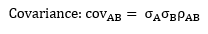

In [136]:
corr_matrix.loc["WMT", "AAPL"] * np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"])

0.00010354025020297424

In [138]:
cov_matrix.loc["WMT", "AAPL"]

0.00010354025020297424

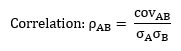

In [141]:
cov_matrix.loc["WMT", "AAPL"] / (np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"]))

0.3691434749457076

In [143]:
corr_matrix.loc["WMT", "AAPL"]

0.3691434749457076

## Portfolio Risk (2-Asset-Case) 

In [147]:
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [149]:
w2

array([0.01010101, 0.98989899])

In [151]:
subset

,Risk,Return
Ticker,,
WMT,0.22,0.15
AAPL,0.32,0.33


In [153]:
# assuming perfect correlation (==1)
std2 = subset.Risk.dot(w2)
std2

0.31610455975671453

__Formula (2-Asset-Case:)__

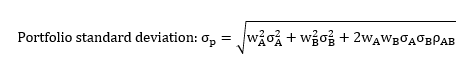

In [157]:
cov_matrix # daily

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
BA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
DIS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
GE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
JPM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
MSFT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
TSLA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
WMT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
WMT_neg,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00


In [159]:
cov_matrix = cov_matrix * 252 # annual
cov_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,0.10,0.07,0.05,0.05,0.04,0.07,0.10,0.03,-0.03
BA,0.07,0.26,0.09,0.12,0.10,0.06,0.11,0.02,-0.02
DIS,0.05,0.09,0.12,0.07,0.06,0.05,0.07,0.02,-0.02
GE,0.05,0.12,0.07,0.16,0.08,0.04,0.06,0.02,-0.02
JPM,0.04,0.10,0.06,0.08,0.10,0.04,0.06,0.02,-0.02
MSFT,0.07,0.06,0.05,0.04,0.04,0.09,0.09,0.03,-0.03
TSLA,0.10,0.11,0.07,0.06,0.06,0.09,0.43,0.02,-0.02
WMT,0.03,0.02,0.02,0.02,0.02,0.03,0.02,0.05,-0.05
WMT_neg,-0.03,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.05,0.05


__More general Formula (Linear Algebra):__

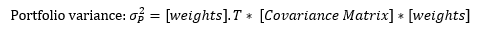

## Correlation and the Portfolio Diversification Effect

In [174]:
corr_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,1.00,0.41,0.44,0.37,0.42,0.75,0.49,0.37,-0.37
BA,0.41,1.00,0.51,0.62,0.59,0.37,0.32,0.16,-0.16
DIS,0.44,0.51,1.00,0.48,0.57,0.48,0.32,0.24,-0.24
GE,0.37,0.62,0.48,1.00,0.63,0.37,0.23,0.17,-0.17
JPM,0.42,0.59,0.57,0.63,1.00,0.43,0.27,0.25,-0.25
MSFT,0.75,0.37,0.48,0.37,0.43,1.00,0.45,0.38,-0.38
TSLA,0.49,0.32,0.32,0.23,0.27,0.45,1.00,0.15,-0.15
WMT,0.37,0.16,0.24,0.17,0.25,0.38,0.15,1.00,-1.00
WMT_neg,-0.37,-0.16,-0.24,-0.17,-0.25,-0.38,-0.15,-1.00,1.00


-> moderate positve correlation <br>
-> there must be a __portfolio diversification effect__ (no straight line)

In [177]:
port_ret

array([0.32850035, 0.32666048, 0.3248206 , 0.32298072, 0.32114085,
       0.31930097, 0.3174611 , 0.31562122, 0.31378134, 0.31194147,
       0.31010159, 0.30826172, 0.30642184, 0.30458197, 0.30274209,
       0.30090221, 0.29906234, 0.29722246, 0.29538259, 0.29354271,
       0.29170283, 0.28986296, 0.28802308, 0.28618321, 0.28434333,
       0.28250345, 0.28066358, 0.2788237 , 0.27698383, 0.27514395,
       0.27330407, 0.2714642 , 0.26962432, 0.26778445, 0.26594457,
       0.26410469, 0.26226482, 0.26042494, 0.25858507, 0.25674519,
       0.25490531, 0.25306544, 0.25122556, 0.24938569, 0.24754581,
       0.24570594, 0.24386606, 0.24202618, 0.24018631, 0.23834643,
       0.23650656, 0.23466668, 0.2328268 , 0.23098693, 0.22914705,
       0.22730718, 0.2254673 , 0.22362742, 0.22178755, 0.21994767,
       0.2181078 , 0.21626792, 0.21442804, 0.21258817, 0.21074829,
       0.20890842, 0.20706854, 0.20522866, 0.20338879, 0.20154891,
       0.19970904, 0.19786916, 0.19602929, 0.19418941, 0.19234

In [183]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

ValueError: shapes (100,2) and (9,9) not aligned: 2 (dim 1) != 9 (dim 0)

In [185]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s = 10)
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

NameError: name 'port_risk' is not defined

<Figure size 1500x900 with 0 Axes>

__Now assuming various values for the Correlation Coefficient__ (everything else equal)

In [188]:
corrs = [(-1, "green"), (-0.5, "yellow"), (0, "grey"), (0.5, "blue"), (1, "red")]

In [190]:
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [192]:
subset

,Risk,Return
Ticker,,
WMT,0.22,0.15
AAPL,0.32,0.33


In [194]:
cov_matrix

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT,WMT_neg
Ticker,,,,,,,,,
AAPL,0.10,0.07,0.05,0.05,0.04,0.07,0.10,0.03,-0.03
BA,0.07,0.26,0.09,0.12,0.10,0.06,0.11,0.02,-0.02
DIS,0.05,0.09,0.12,0.07,0.06,0.05,0.07,0.02,-0.02
GE,0.05,0.12,0.07,0.16,0.08,0.04,0.06,0.02,-0.02
JPM,0.04,0.10,0.06,0.08,0.10,0.04,0.06,0.02,-0.02
MSFT,0.07,0.06,0.05,0.04,0.04,0.09,0.09,0.03,-0.03
TSLA,0.10,0.11,0.07,0.06,0.06,0.09,0.43,0.02,-0.02
WMT,0.03,0.02,0.02,0.02,0.02,0.03,0.02,0.05,-0.05
WMT_neg,-0.03,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.05,0.05


In [196]:
port_ret

array([0.32850035, 0.32666048, 0.3248206 , 0.32298072, 0.32114085,
       0.31930097, 0.3174611 , 0.31562122, 0.31378134, 0.31194147,
       0.31010159, 0.30826172, 0.30642184, 0.30458197, 0.30274209,
       0.30090221, 0.29906234, 0.29722246, 0.29538259, 0.29354271,
       0.29170283, 0.28986296, 0.28802308, 0.28618321, 0.28434333,
       0.28250345, 0.28066358, 0.2788237 , 0.27698383, 0.27514395,
       0.27330407, 0.2714642 , 0.26962432, 0.26778445, 0.26594457,
       0.26410469, 0.26226482, 0.26042494, 0.25858507, 0.25674519,
       0.25490531, 0.25306544, 0.25122556, 0.24938569, 0.24754581,
       0.24570594, 0.24386606, 0.24202618, 0.24018631, 0.23834643,
       0.23650656, 0.23466668, 0.2328268 , 0.23098693, 0.22914705,
       0.22730718, 0.2254673 , 0.22362742, 0.22178755, 0.21994767,
       0.2181078 , 0.21626792, 0.21442804, 0.21258817, 0.21074829,
       0.20890842, 0.20706854, 0.20522866, 0.20338879, 0.20154891,
       0.19970904, 0.19786916, 0.19602929, 0.19418941, 0.19234

In [198]:
corrs = [(-1, "green"), (-0.5, "yellow"), (0, "grey"), (0.5, "blue"), (1, "red")]

plt.figure(figsize = (15, 9))
for corr in corrs:
    cov = corr[0] * np.sqrt(cov_matrix.iloc[0,0]) * np.sqrt(cov_matrix.iloc[1,1]) #cov of itself is variance, hence it's sqrt of variance to retireve standard deviation (sd WMT * SD AAPL * Correlation = cov)
    cov_matrix.iloc[0,1] = cov #updates values of the matrix since there are diff correlations involved
    cov_matrix.iloc[1,0] = cov
    port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
    
    plt.scatter(port_risk, port_ret, s = 10, color = corr[1],  label = "Corr == {}".format(corr[0]))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

ValueError: shapes (100,2) and (9,9) not aligned: 2 (dim 1) != 9 (dim 0)

<Figure size 1500x900 with 0 Axes>

-> Portfolio Diversification Effect: more Return for the same Risk / less Risk for the same Return (__"the only free lunch in the market"__)

## Multiple Asset Case

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.88,198.59,107.46,211.15,92.75,68.17,23.51,75.36
2017-07-05,36.02,201.81,105.63,210.38,93.68,69.08,21.81,75.32
2017-07-06,35.68,201.48,103.35,202.38,93.38,68.57,20.59,75.47
2017-07-07,36.04,202.37,103.32,201.15,93.85,69.46,20.88,75.33
2017-07-10,36.26,203.96,103.59,200.31,93.19,69.98,21.07,73.23
...,...,...,...,...,...,...,...,...
2022-06-24,141.66,141.53,97.78,67.08,117.32,267.70,245.71,123.72
2022-06-27,141.66,138.72,96.61,66.71,116.38,264.89,244.92,124.12
2022-06-28,137.44,138.70,95.92,65.88,115.82,256.48,232.66,122.37


In [207]:
assets = ["WMT", "AAPL", "BA"] # 3-Asset-Case
#assets = df.columns

In [209]:
subset = df[assets].copy()
subset

,WMT,AAPL,BA
Date,,,
2017-07-03,75.36,35.88,198.59
2017-07-05,75.32,36.02,201.81
2017-07-06,75.47,35.68,201.48
2017-07-07,75.33,36.04,202.37
2017-07-10,73.23,36.26,203.96
...,...,...,...
2022-06-24,123.72,141.66,141.53
2022-06-27,124.12,141.66,138.72
2022-06-28,122.37,137.44,138.70


In [211]:
returns = subset.pct_change()
returns

,WMT,AAPL,BA
Date,,,
2017-07-03,NaN,NaN,NaN
2017-07-05,-0.00,0.00,0.02
2017-07-06,0.00,-0.01,-0.00
2017-07-07,-0.00,0.01,0.00
2017-07-10,-0.03,0.01,0.01
...,...,...,...
2022-06-24,0.00,0.02,0.06
2022-06-27,0.00,0.00,-0.02
2022-06-28,-0.01,-0.03,-0.00


In [213]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [215]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
WMT,0.23,0.10
AAPL,0.32,0.31
BA,0.50,-0.07


In [217]:
cov_matrix = returns.cov() * 252
cov_matrix

,WMT,AAPL,BA
WMT,0.05,0.03,0.02
AAPL,0.03,0.10,0.07
BA,0.02,0.07,0.25


In [219]:
noa = len(returns.columns) # number of assets
noa

3

In [221]:
nop = 1000000 # number of random portfolios
nop

1000000

In [223]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [225]:
matrix

array([[0.69646919, 0.28613933, 0.22685145],
       [0.55131477, 0.71946897, 0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 ],
       ...,
       [0.9440244 , 0.08957476, 0.31937574],
       [0.84773167, 0.30084755, 0.01719894],
       [0.05623912, 0.31624475, 0.08490701]])

In [227]:
matrix.sum(axis = 1, keepdims= True)

array([[1.20945997],
       [1.6938902 ],
       [2.14652584],
       ...,
       [1.3529749 ],
       [1.16577816],
       [0.45739088]])

In [229]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.57585137, 0.23658438, 0.18756425],
       [0.32547255, 0.42474357, 0.24978388],
       [0.45690771, 0.31904099, 0.2240513 ],
       ...,
       [0.69773977, 0.06620578, 0.23605445],
       [0.72718095, 0.25806587, 0.01475318],
       [0.12295637, 0.69141027, 0.18563336]])

In [231]:
summary

,ann. Risk,CAGR
WMT,0.23,0.10
AAPL,0.32,0.31
BA,0.50,-0.07


__one portfolio__

In [234]:
w1 = weights[0]
w1

array([0.57585137, 0.23658438, 0.18756425])

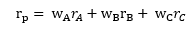

In [237]:
# Linear Algebra
ret1 = summary.CAGR.dot(w1)
ret1

0.1172068955439275

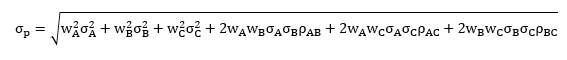

In [240]:
# Linear Algebra
risk1 =  np.sqrt((w1.dot(cov_matrix).dot(w1)))  # first one is to find the intermediate vector
risk1

0.2222749977646481

In [242]:
cov_matrix

,WMT,AAPL,BA
WMT,0.05,0.03,0.02
AAPL,0.03,0.10,0.07
BA,0.02,0.07,0.25


__multiple portfolios__

In [245]:
port_ret = summary.CAGR.dot(weights.T)
port_ret

array([0.1172069 , 0.14540715, 0.12797223, ..., 0.07356282, 0.15150538,
       0.21168772])

In [246]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

array([0.222275  , 0.2534906 , 0.23493943, ..., 0.22574807, 0.2144176 ,
       0.28481687])

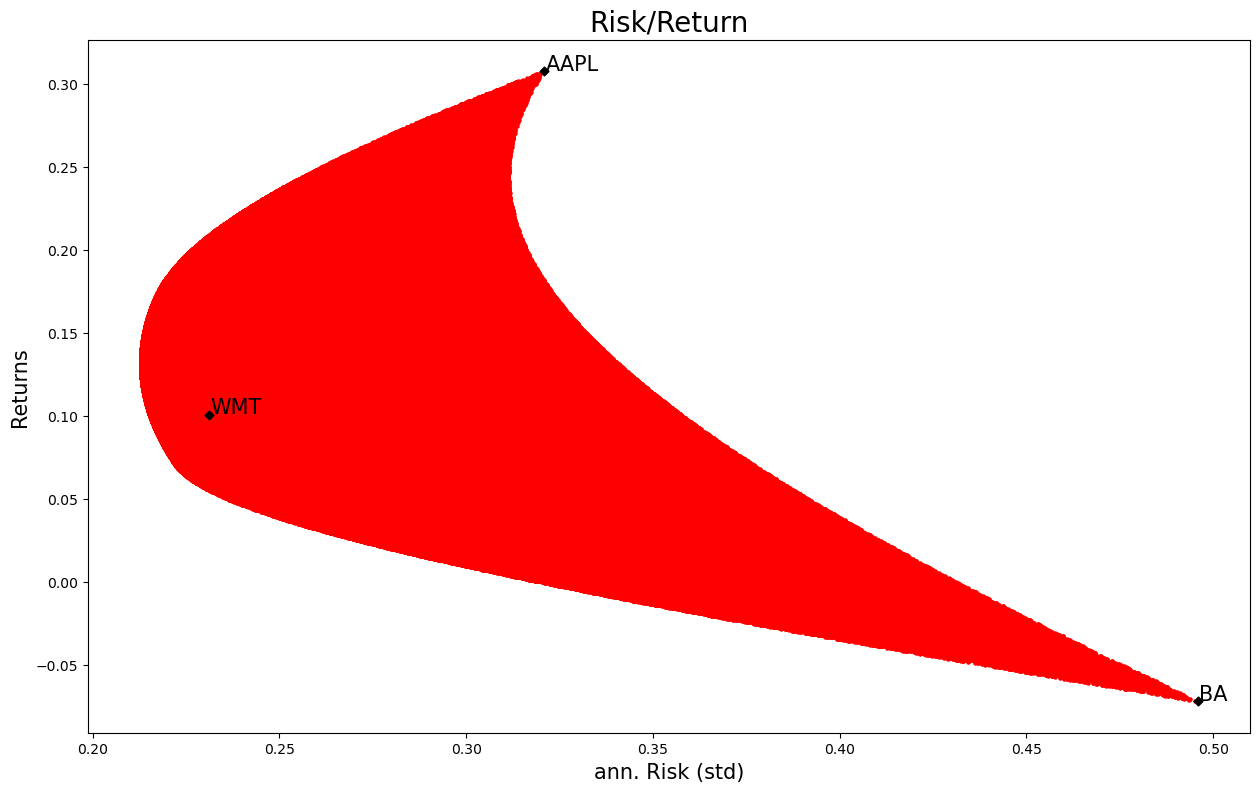

In [248]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Optimization

__Challenge__: We need to __forecast__ inputs like __Covariance Matrix__ and __Returns__

__Simple Solution__: Use __past__ Covariance Matrix and Returns

__Problem__: Past performance is __not a (good) indicator__ for future performance (in particular Returns)

__Solution__:<br>
- using past Coveriance Matrix or variants of it (e.g. shrinkage) is widely accepted <br>
- using past Returns is not accepted (see pitfalls)
    

__Optimization Tools__:

We can, again, use __scipy optimizer__ (numerical/iterative optimization) or...

__Unbounded Optimization with Linear Algebra (formula based)__

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [262]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [264]:
assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
#assets = df.columns

In [266]:
subset = df[assets].copy()
subset

,WMT,AAPL,MSFT
Date,,,
2017-07-03,75.360001,35.875000,68.169998
2017-07-05,75.320000,36.022499,69.080002
2017-07-06,75.470001,35.682499,68.570000
2017-07-07,75.330002,36.044998,69.459999
2017-07-10,73.230003,36.264999,69.980003
...,...,...,...
2022-06-24,123.720001,141.660004,267.700012
2022-06-27,124.120003,141.660004,264.890015
2022-06-28,122.370003,137.440002,256.480011


In [268]:
returns = subset.pct_change()
returns

,WMT,AAPL,MSFT
Date,,,
2017-07-03,NaN,NaN,NaN
2017-07-05,-0.000531,0.004111,0.013349
2017-07-06,0.001992,-0.009439,-0.007383
2017-07-07,-0.001855,0.010159,0.012979
2017-07-10,-0.027877,0.006104,0.007486
...,...,...,...
2022-06-24,0.000809,0.024517,0.034150
2022-06-27,0.003233,0.000000,-0.010497
2022-06-28,-0.014099,-0.029790,-0.031749


In [270]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [272]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
WMT,0.231063,0.100635
AAPL,0.320728,0.307632
MSFT,0.294188,0.304624


In [274]:
cov_matrix = returns.cov() * 252
cov_matrix

,WMT,AAPL,MSFT
WMT,0.053390,0.026421,0.026760
AAPL,0.026421,0.102866,0.071477
MSFT,0.026760,0.071477,0.086547


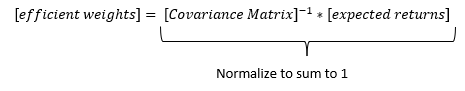

__Creating the inverse Covariance Matrix__ (beyond scope)

In [278]:
cov_matrix_inv = pd.DataFrame(np.linalg.pinv(cov_matrix.values), cov_matrix.columns, cov_matrix.index)
cov_matrix_inv

,WMT,AAPL,MSFT
WMT,22.376420,-2.205580,-5.097280
AAPL,-2.205580,23.029922,-18.337874
MSFT,-5.097280,-18.337874,28.275354


In [280]:
# matrix multiplication between a matrix and its inverse matrix gives identity matrix 
cov_matrix.dot(cov_matrix_inv) 

,WMT,AAPL,MSFT
WMT,1.000000,0.000000,0.000000
AAPL,0.000000,1.000000,-0.000000
MSFT,0.000000,-0.000000,1.000000


In [282]:
w = cov_matrix_inv.dot(summary.CAGR) # see formula
w

WMT    0.020595
AAPL   1.276609
MSFT   2.459086
dtype: float64

In [284]:
optimal_weights = (w/w.sum()) # normalize to 1
optimal_weights

WMT    0.005483
AAPL   0.339859
MSFT   0.654658
dtype: float64

In [286]:
#summary

In [288]:
# changing return inputs/assumptions
#summary.CAGR = summary.CAGR + np.array([0.02, 0.02, -0.02])
#summary

## Forward-looking Mean-Variance Optimization (MVO): Pitfalls

__typcial problems:__

- can lead to __short__ positions and positions __> 1__ (unbounded)
- will certainly lead to __concentrated__ portfolios (unbounded)
- highly dependent on & sensitive to __inputs/assumptions__ (return forecasts) -> GIGO
- small changes in forecasts (returns) lead to __large changes in weights__ (rebalancing costs!)
- __no guarantee__ that MVO-optimized Portfolio performs better than naive-diversified portfolio

__recap: bounded/contrained Optimization with Scipy__

In [622]:
import scipy.optimize as sco 

In [640]:
returns

,WMT,AAPL,MSFT
Date,,,
2017-07-03,NaN,NaN,NaN
2017-07-05,-0.000531,0.004111,0.013349
2017-07-06,0.001992,-0.009439,-0.007383
2017-07-07,-0.001855,0.010159,0.012979
2017-07-10,-0.027877,0.006104,0.007486
...,...,...,...
2022-06-24,0.000809,0.024517,0.034150
2022-06-27,0.003233,0.000000,-0.010497
2022-06-28,-0.014099,-0.029790,-0.031749


In [626]:
cov_matrix

,WMT,AAPL,MSFT
WMT,0.053390,0.026421,0.026760
AAPL,0.026421,0.102866,0.071477
MSFT,0.026760,0.071477,0.086547


In [628]:
summary

,ann. Risk,CAGR
WMT,0.231063,0.100635
AAPL,0.320728,0.307632
MSFT,0.294188,0.304624


In [642]:
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr


In [644]:
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [646]:
def min_func_RaR(weights): 
     return -port_ret(weights) / port_vol(weights) 

In [648]:
noa = len(summary)
noa

3

In [650]:
eweigths = np.full(noa, 1/noa)
eweigths

array([0.33333333, 0.33333333, 0.33333333])

In [654]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [593]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1))

In [656]:
opts = sco.minimize(min_func_RaR, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [658]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0695302077434536
       x: [ 5.417e-03  3.397e-01  6.548e-01]
     nit: 7
     jac: [-7.814e-04 -1.163e-04  6.524e-05]
    nfev: 29
    njev: 7

In [599]:
optimal_weights = opts["x"]
optimal_weights

array([0.00541733, 0.3397464 , 0.65483627])

In [660]:
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

MSFT   0.654658
AAPL   0.339859
WMT    0.005483
dtype: float64

In [662]:
cagr_opt = port_ret(optimal_weights)
cagr_opt

0.30452789518650875

In [664]:
vol_opt = port_vol(optimal_weights)
vol_opt

0.2847305209797306

In [666]:
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

1.0695302145293635

## Introduction of a Risk-Free Asset

__Risky Assets__: Stocks, Corporate Bonds, Commodities, Cryptocurrencies, etc. (__volatility & uncertain outcomes__) <br>
__Risk-free Asset__: Short-Term Government Bond (USA, Germany): __known outcome__ (Coupon Rate / Yield)

In [ ]:
# return of risk-free asset
rf = 0.03

In [ ]:
# risk / standard deviation of risk-free asset
rfr = 0

In addition: Zero Correlation with risky assets.

Better metric for risk-adjusted return: __Sharpe Ratio__

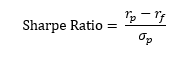

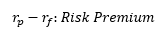

In [ ]:
rf = 0.03# return of risk-free asset
# risk / standard deviation of risk-free asset
rfr = 0

def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk
def min_func_RaR(weights): 
     return -port_ret(weights) / port_vol(weights) 
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
assets = df.columns
subset = df[assets].copy()
returns = subset.pct_change()
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary
summary = ann_risk_return(returns)
summary["Sharpe"] = (summary.CAGR - rf) / summary["ann. Risk"]
cov_matrix = returns.cov() * 252
noa = len(returns.columns) # number of assets
nop = 1000000 # number of random portfolios
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

port_ret = summary.CAGR.dot(weights.T)
port_ret

port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

sharpe_ratio = (port_ret - rf) / port_risk
sharpe_ratio

sharpe_ratio.min()
sharpe_ratio.max()

summary.loc["Rf"] = [rfr, rf, np.nan]

summary

plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, c = sharpe_ratio, cmap = "coolwarm", vmin = 0.5, vmax = 1)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, c = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlim(0, 0.65)
plt.ylim(-0.25, 0.65)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
#assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
assets = df.columns

In [ ]:
subset = df[assets].copy()
subset

In [ ]:
returns = subset.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
summary["Sharpe"] = (summary.CAGR - rf) / summary["ann. Risk"]
summary

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

In [ ]:
noa = len(returns.columns) # number of assets
noa

In [ ]:
nop = 1000000 # number of random portfolios
nop

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

In [ ]:
port_ret = summary.CAGR.dot(weights.T)
port_ret

In [ ]:
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

In [ ]:
sharpe_ratio = (port_ret - rf) / port_risk
sharpe_ratio

In [ ]:
sharpe_ratio.min()

In [ ]:
sharpe_ratio.max()

In [ ]:
summary.loc["Rf"] = [rfr, rf, np.nan]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, c = sharpe_ratio, cmap = "coolwarm", vmin = 0.5, vmax = 1)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, c = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlim(0, 0.65)
plt.ylim(-0.25, 0.65)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## The Sharpe Ratio: Graphical Interpretation

__Example: Sharpe Ratio MSFT__

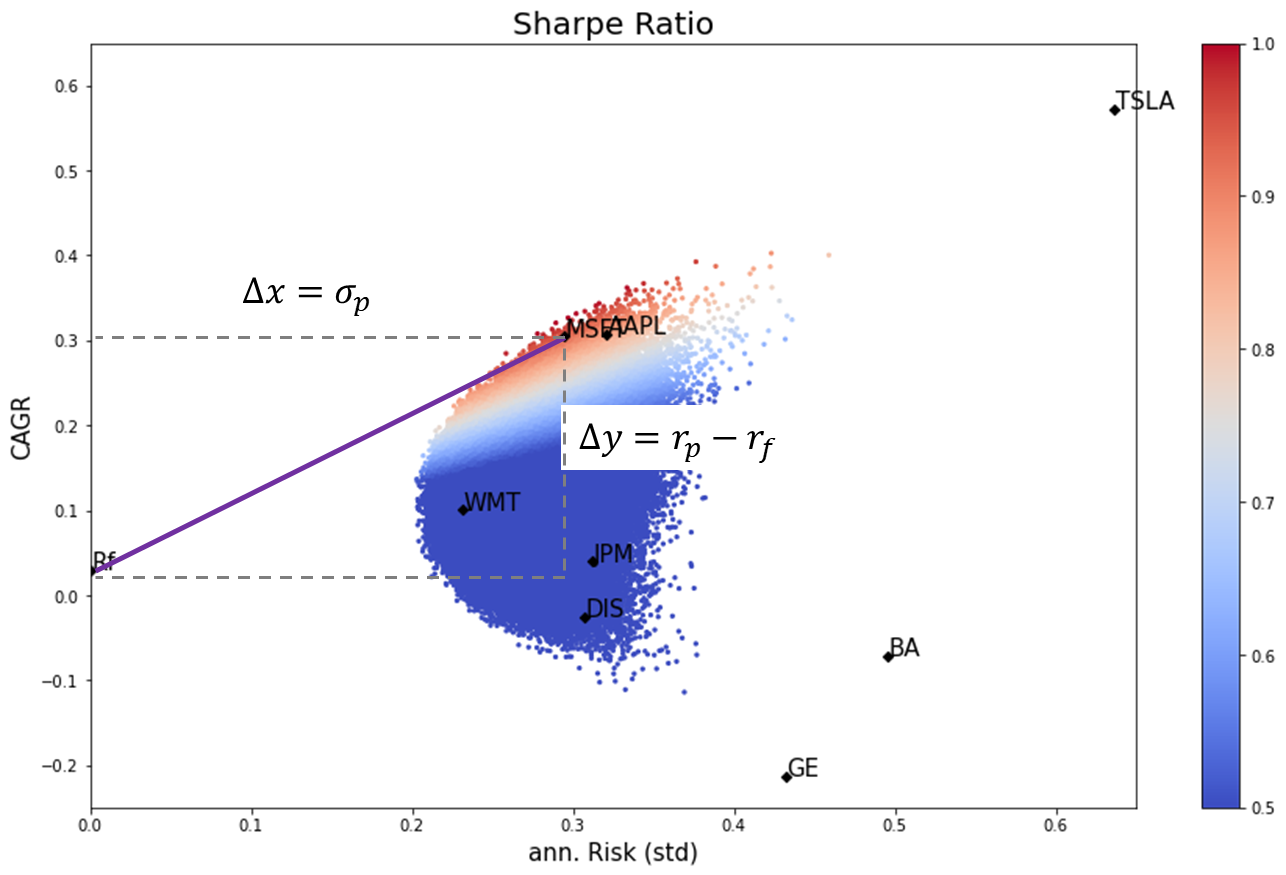

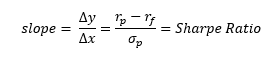

-> The __Sharpe Ratio__ of an Asset/Portfolio can be interpreted as the __Slope__ of the straight line connecting the __Asset/Portfolio with the Risk-free Asset__.

## Portfolio Optimization with Risk-free Asset (Part 1)

__Portfolio Optimization__: Finding the Portfolio with the __highest Sharpe Ratio__

__Graphical Solution__: Drawing a Tangency line from Risk-Free Asset to Efficient Frontier -> __Tangency Portfolio__

In [ ]:
import scipy.optimize as sco

In [ ]:
summary.drop(index = "Rf", inplace = True)
summary

In [ ]:
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr

In [ ]:
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [ ]:
def sharpe(weights): 
     return -(port_ret(weights)-rf) / port_vol(weights) 

In [ ]:
noa = len(summary)
noa

In [ ]:
eweigths = np.full(noa, 1/noa)
eweigths

__Efficient Frontier__

In [ ]:
# portfolio return == tcagr
cons = ({"type": "eq", "fun": lambda x: port_ret(x)-tcagr},
       {"type": "eq", "fun": lambda x: np.sum(x) -1})

In [ ]:
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 500)
tcagrs

In [ ]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

In [ ]:
vols = []

In [ ]:
#for each target return, find the portfolio with the lowest volatility
for tcagr in tcagrs:
    res = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds= bnds, constraints= cons)
    vols.append(res["fun"])
vols = np.array(vols)

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()

## Portfolio Optimization with Risk-free Asset (Part 2)

__Optimization (max Sharpe Ratio)__

In [ ]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [ ]:
opts = sco.minimize(sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [ ]:
opts

In [ ]:
optimal_weights = opts["x"]
optimal_weights

In [ ]:
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

In [ ]:
cagr_opt = port_ret(optimal_weights)
cagr_opt

In [ ]:
vol_opt = port_vol(optimal_weights)
vol_opt

In [ ]:
sharpe_opt = -sharpe(optimal_weights)
sharpe_opt 

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.scatter(rfr, rf, s= 50, marker = "D", c = "red")
plt.annotate("Rf", xy= (rfr+0.01, rf+0.01), size = 15)
plt.scatter(vol_opt, cagr_opt, s= 50, marker = "D", c = "green")
plt.annotate("MSRP", xy= (vol_opt+0.0, cagr_opt+0.02), size = 15)
plt.plot(np.array([0, 0.6]), rf+sharpe_opt*np.array([0, 0.6]), label = "Capital Market Line (CML)")
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__(Unbounded) Optimization with Linear Algebra__:

## Implications and the Two-Fund-Theorem

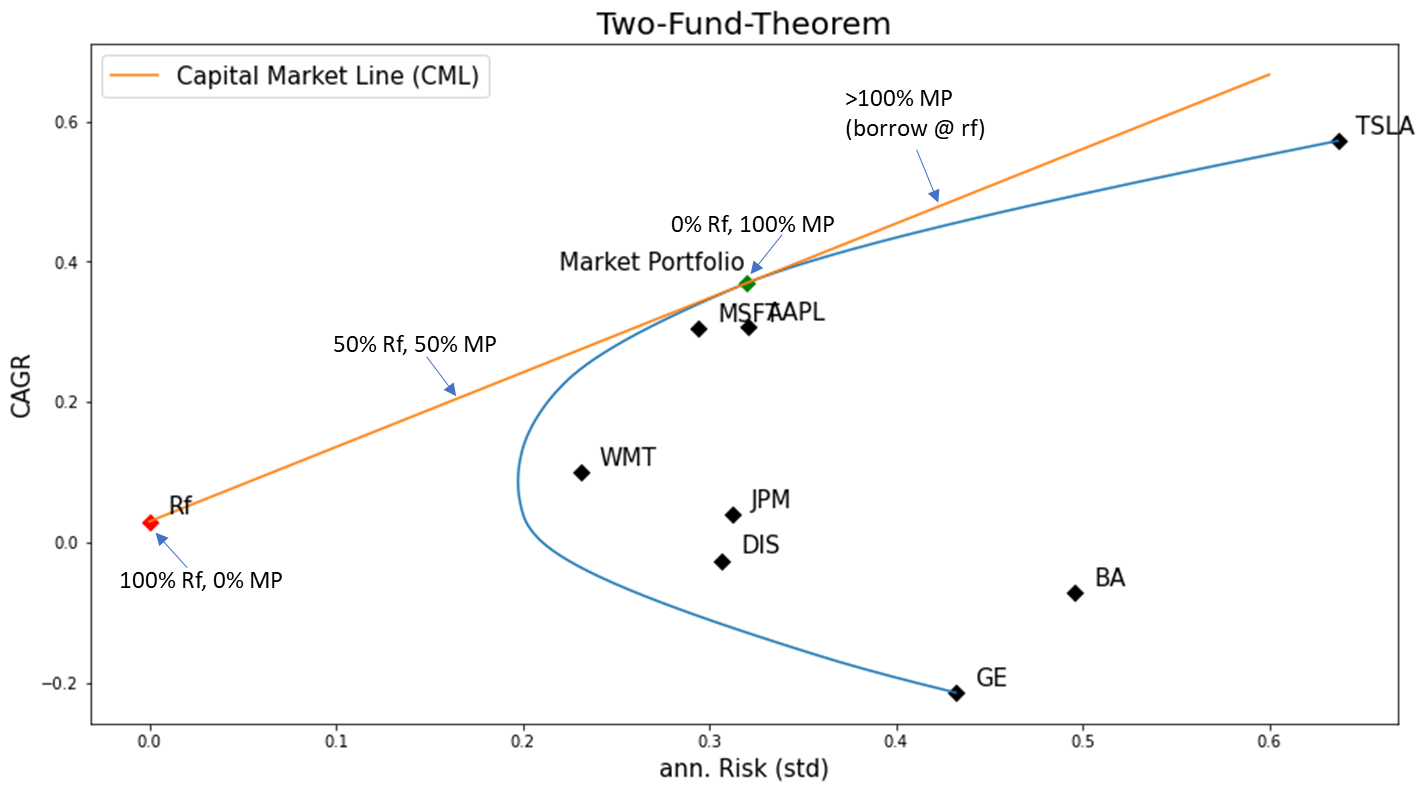